# Lab 5 - Classification : Naive Bayes and Logistic Regression

# Optical recognition of handwritten digits dataset
**Download dataset from sklearn. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1.**

# Using sklearn (25 points)

**For this exercise, you will use the naive bayes and logistic regression functions in sklearn. Use the optical recognition dataset.**


**a) Logistic Regression - use one vs all classification method to classify the dataset into one of the ten classes. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too). Tune parameters to obtain the best results.**

**b) Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with all the priors available (Gaussian, Bernoulli, etc) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).**

**Estimated Time: 50 mins**

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix


In [2]:
digits = load_digits()
features = digits['data']
target = digits['target'].reshape(-1,1)

In [3]:
np.unique(target) # 10 classes digits from 0 to 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 432x288 with 0 Axes>

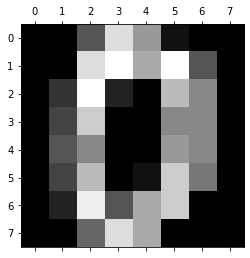

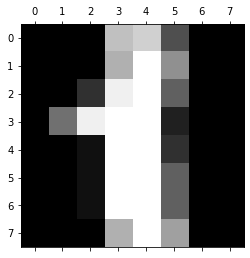

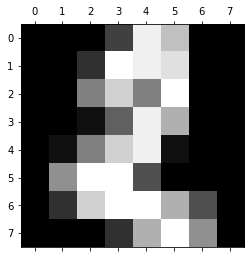

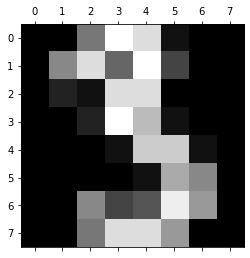

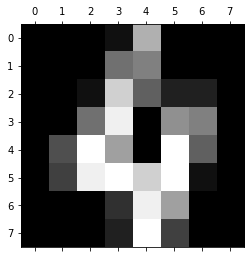

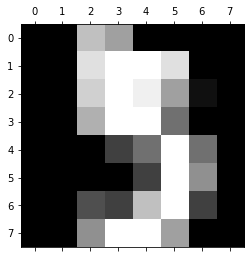

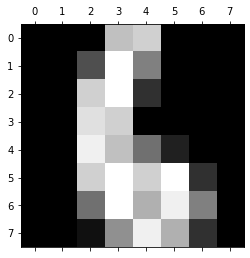

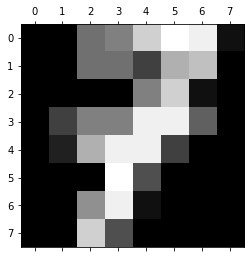

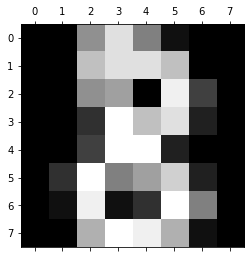

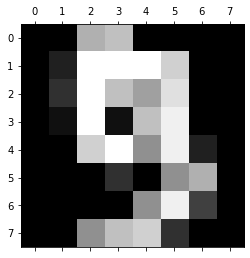

In [4]:
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i]) # 
    plt.show()

Summarize your findings and results here

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2, random_state = 20)

# Part-A(Logistic Regression)

In [6]:
# Create one-vs-rest logistic regression object
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
log_reg = LogisticRegression(random_state=0, multi_class='ovr')
log_reg.fit(X_train_std,y_train)

y_train_pred = log_reg.predict(X_train_std)
y_test_pred = log_reg.predict(X_test_std)

## F1 Score and Confusion Matrix 

In [7]:
print("Training f1 score:", f1_score(y_train_pred,y_train, average = 'macro'))
print("Testing f1 score:", f1_score(y_test_pred,y_test,average = 'macro'))

Training f1 score: 0.9846140563328657
Testing f1 score: 0.9624499871788428


In [8]:
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)

[[141   0   0   0   0   0   0   0   0   0]
 [  0 149   0   0   0   0   0   0   1   1]
 [  0   0 149   0   0   0   0   0   0   0]
 [  0   0   0 144   0   0   0   0   1   0]
 [  0   0   0   0 137   0   0   1   1   1]
 [  0   0   0   0   0 148   0   0   0   1]
 [  0   1   0   0   1   0 133   0   1   0]
 [  0   0   0   0   0   0   0 138   0   1]
 [  0   6   1   1   0   0   0   1 130   0]
 [  0   0   0   1   0   0   0   0   1 146]]


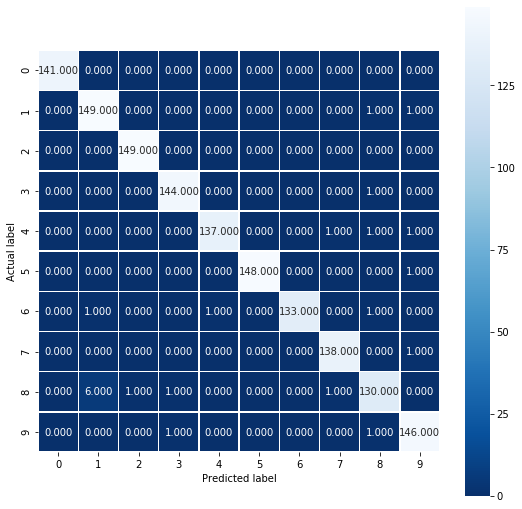

In [9]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_train, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [10]:
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  1  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  0  2]
 [ 1  0  0  0  0 31  0  0  0  1]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  1  0 31  2]
 [ 0  0  0  0  0  1  0  1  1 29]]


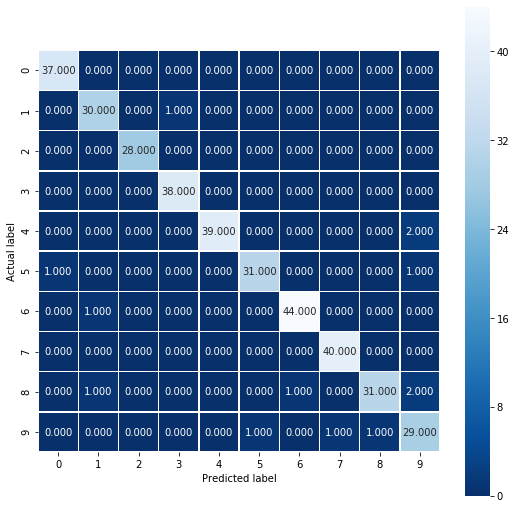

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Hyper parameter tuning

In [12]:
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg = LogisticRegression()
grid = GridSearchCV(log_reg,parameters,cv=5)
grid.fit(features_scaled,target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [13]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
log_reg_tuned = grid.best_estimator_
log_reg_tuned.fit(X_train_std,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_train_pred = log_reg_tuned.predict(X_train_std)
y_test_pred = log_reg_tuned.predict(X_test_std)

In [16]:
print("Training f1 score:", f1_score(y_train_pred,y_train, average = 'macro'))
print("Testing f1 score:", f1_score(y_test_pred,y_test,average = 'macro'))

Training f1 score: 0.9846140563328657
Testing f1 score: 0.9624499871788428


In [17]:
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)

[[141   0   0   0   0   0   0   0   0   0]
 [  0 149   0   0   0   0   0   0   1   1]
 [  0   0 149   0   0   0   0   0   0   0]
 [  0   0   0 144   0   0   0   0   1   0]
 [  0   0   0   0 137   0   0   1   1   1]
 [  0   0   0   0   0 148   0   0   0   1]
 [  0   1   0   0   1   0 133   0   1   0]
 [  0   0   0   0   0   0   0 138   0   1]
 [  0   6   1   1   0   0   0   1 130   0]
 [  0   0   0   1   0   0   0   0   1 146]]


# PartB(Naive Bayes Classifier)

In [18]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train,y_train)

y_train_pred = naive_bayes.predict(X_train)
y_test_pred = naive_bayes.predict(X_test)

print("Training f1 score:", f1_score(y_train_pred,y_train, average = 'macro'))
print("Testing f1 score:", f1_score(y_test_pred,y_test,average = 'macro'))

cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)

cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)

Training f1 score: 0.8591021190121312
Testing f1 score: 0.8615006417407219
[[138   1   0   0   2   0   0   0   0   0]
 [  0  93  20   0   2   1   0   1  26   8]
 [  0   6 132   3   0   0   0   1   7   0]
 [  1   1   3 121   0   2   0   2   7   8]
 [  0   0   0   0 133   0   0   6   1   0]
 [  2   3   0   3   1 121   2   0   1  16]
 [  0   3   0   0   2   1 129   0   1   0]
 [  0   0   0   0   4   0   0 135   0   0]
 [  0  13   1   3   0   2   1   1 110   8]
 [  0   6   0   4   4   1   0   8   4 121]]
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 19  3  0  0  0  1  0  6  2]
 [ 0  0 21  3  0  0  0  0  4  0]
 [ 0  0  0 35  0  1  0  0  1  1]
 [ 0  1  0  0 39  0  0  1  0  0]
 [ 0  0  0  0  0 29  0  0  2  2]
 [ 0  2  0  0  0  1 42  0  0  0]
 [ 0  0  0  0  0  0  0 39  1  0]
 [ 0  0  0  0  0  0  1  1 30  3]
 [ 0  3  0  0  1  2  0  1  2 23]]


In [19]:
from sklearn.naive_bayes import GaussianNB
gaus_bayes = GaussianNB()
gaus_bayes.fit(X_train,y_train)

y_train_pred = gaus_bayes.predict(X_train)
y_test_pred = gaus_bayes.predict(X_test)

print("Training f1 score:", f1_score(y_train_pred,y_train, average = 'macro'))
print("Testing f1 score:", f1_score(y_test_pred,y_test,average = 'macro'))

cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)

cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)

Training f1 score: 0.8817822633095656
Testing f1 score: 0.8808864991686273
[[139   0   0   0   1   0   0   1   0   0]
 [  0 126   2   0   0   0   3   5  10   5]
 [  0   6 126   0   0   0   0   0  17   0]
 [  0   1   1 120   0   5   0   5  12   1]
 [  0   1   0   0 117   1   2  17   2   0]
 [  0   0   0   1   0 142   0   4   1   1]
 [  0   1   0   0   0   0 135   0   0   0]
 [  0   0   0   0   1   1   0 137   0   0]
 [  0   8   0   1   0   3   0   7 120   0]
 [  1   5   1   8   3   1   0  16  10 103]]
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  2  0  2  1]
 [ 0  1 21  0  1  0  1  0  4  0]
 [ 0  0  1 33  0  1  0  2  1  0]
 [ 0  0  0  0 34  1  0  6  0  0]
 [ 0  0  0  0  0 32  0  0  1  0]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  1  0  3 31  0]
 [ 0  2  0  1  0  2  0  2  4 21]]


In [20]:
from sklearn.naive_bayes import MultinomialNB
multi_bayes = MultinomialNB()
multi_bayes.fit(X_train, y_train)

y_train_pred = multi_bayes.predict(X_train)
y_test_pred = multi_bayes.predict(X_test)

print("Training f1 score:", f1_score(y_train_pred,y_train, average = 'macro'))
print("Testing f1 score:", f1_score(y_test_pred,y_test,average = 'macro'))

cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)

cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)

Training f1 score: 0.9030531415442953
Testing f1 score: 0.9051397741357861
[[138   0   0   0   3   0   0   0   0   0]
 [  0 115  12   0   0   1   1   0  10  12]
 [  1   7 136   0   0   0   0   0   4   1]
 [  0   0   2 123   0   2   0   3   8   7]
 [  1   0   0   0 134   0   0   3   2   0]
 [  0   0   0   0   1 127   1   1   1  18]
 [  0   1   0   0   1   0 133   0   1   0]
 [  0   0   0   0   1   0   0 137   1   0]
 [  0  11   1   0   0   0   0   0 123   4]
 [  0   1   0   1   2   0   0  10   5 129]]
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 23  4  1  0  0  1  0  1  1]
 [ 0  0 22  0  0  0  0  0  5  1]
 [ 0  0  0 34  0  0  0  2  1  1]
 [ 0  0  0  0 39  0  0  1  1  0]
 [ 0  0  0  0  0 31  0  0  1  1]
 [ 0  1  0  0  0  1 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  1  0]
 [ 0  1  0  0  0  0  1  1 32  0]
 [ 0  0  0  0  0  1  0  1  2 28]]


In [21]:
from sklearn.naive_bayes import ComplementNB
complement_bayes = ComplementNB()
complement_bayes.fit(X_train, y_train)

y_train_pred = complement_bayes.predict(X_train)
y_test_pred = complement_bayes.predict(X_test)

print("Training f1 score:", f1_score(y_train_pred,y_train, average = 'macro'))
print("Testing f1 score:", f1_score(y_test_pred,y_test,average = 'macro'))

cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)

cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)

Training f1 score: 0.8091288281629415
Testing f1 score: 0.8291178859935739
[[138   0   0   0   2   0   1   0   0   0]
 [  0 108  20   0   3   1   2   4   0  13]
 [  0   1 142   0   0   0   0   5   1   0]
 [  2   0  10 118   0   2   2  10   0   1]
 [  0   0   0   0 134   1   0   5   0   0]
 [  1   1   1   0   3 133   1   3   0   6]
 [  1   1   0   0   1   0 133   0   0   0]
 [  0   0   5   0   5   0   0 129   0   0]
 [  1  25  13   8   6   6  11  13  43  13]
 [  4   1   4   8   0   2   3  23   0 103]]
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 22  5  0  0  0  1  1  0  2]
 [ 0  0 26  0  1  0  0  1  0  0]
 [ 0  1  1 34  0  0  0  2  0  0]
 [ 0  0  0  0 40  0  0  1  0  0]
 [ 0  0  0  0  0 31  1  1  0  0]
 [ 0  0  0  0  1  0 44  0  0  0]
 [ 0  0  0  0  2  0  0 38  0  0]
 [ 0  6  4  4  0  0  6  3 10  2]
 [ 0  0  1  0  0  1  0  5  1 24]]


# The End